### Regime Detection

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
# Define the ticker symbols
tickers = ['^GSPC', '^FTSE', 'GC=F', 'CL=F', 'BTC-USD','TLT']

# Download historical data for each ticker
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start='2017-01-01', end='2020-01-01')

print(data['^GSPC'].head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-03  2251.570068  2263.879883  2245.129883  2257.830078  2257.830078   
2017-01-04  2261.600098  2272.820068  2261.600098  2270.750000  2270.750000   
2017-01-05  2268.179932  2271.500000  2260.449951  2269.000000  2269.000000   
2017-01-06  2271.139893  2282.100098  2264.060059  2276.979980  2276.979980   
2017-01-09  2273.590088  2275.489990  2268.899902  2268.899902  2268.899902   

                Volume  
Date   

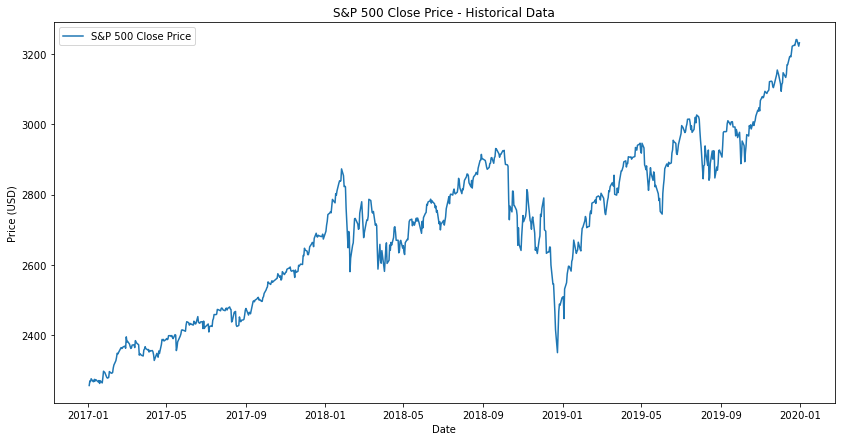

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(data['^GSPC']['Close'], label='S&P 500 Close Price')
plt.title('S&P 500 Close Price - Historical Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

In [4]:
class MarketRegimeHMM:
    def __init__(self, n_components=2):
        self.model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
        self.n_components = n_components
        
    def fit(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        self.model.fit(returns)
        
    def predict(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        return self.model.predict(returns)

# Instantiate and fit the model to S&P 500 closing prices
sp500_hmm = MarketRegimeHMM()
sp500_hmm.fit(data['^GSPC']['Close'])

# Predict the hidden states (market regimes)
sp500_states = sp500_hmm.predict(data['^GSPC']['Close'])

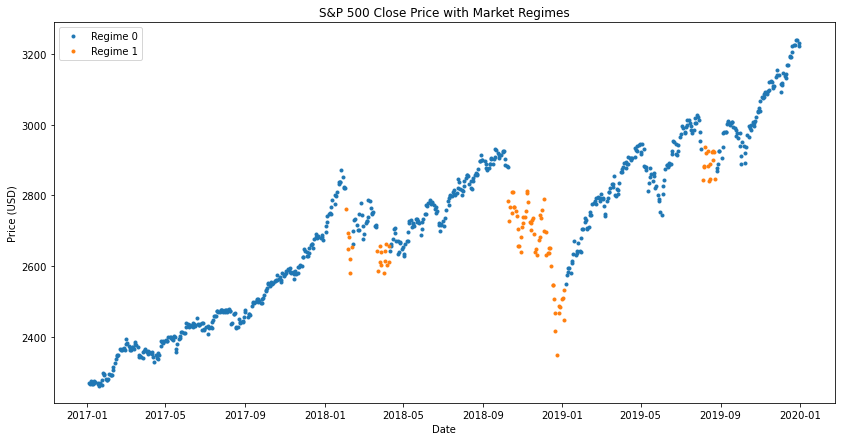

In [6]:
plt.figure(figsize=(14, 7))
for i in range(sp500_hmm.n_components):
    state = (sp500_states == i)
    plt.plot(data['^GSPC'].index[1:][state], data['^GSPC']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('S&P 500 Close Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

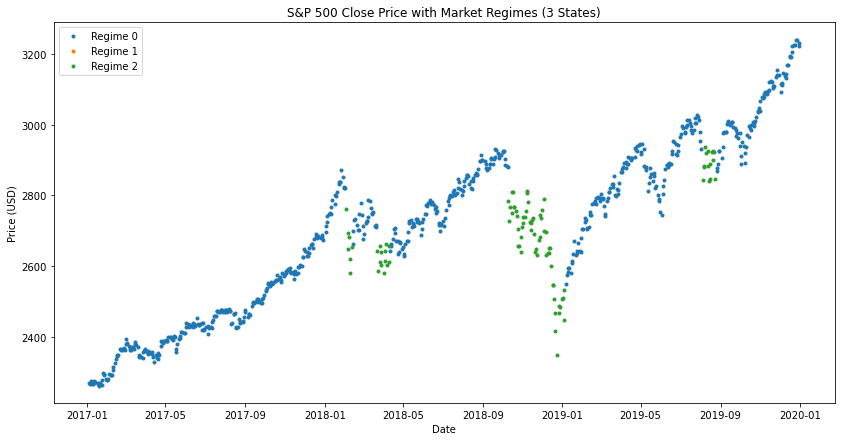

In [20]:
# Try a model with three hidden states
sp500_hmm_3 = MarketRegimeHMM(n_components=3)
sp500_hmm_3.fit(data['^GSPC']['Close'])
sp500_states_3 = sp500_hmm_3.predict(data['^GSPC']['Close'])

# Plot the results
plt.figure(figsize=(14, 7))
for i in range(sp500_hmm_3.n_components):
    state = (sp500_states_3 == i)
    plt.plot(data['^GSPC'].index[1:][state], data['^GSPC']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('S&P 500 Close Price with Market Regimes (3 States)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

Model is not converging.  Current: 2677.4088137495523 is not greater than 2677.4191254095444. Delta is -0.010311659992112254


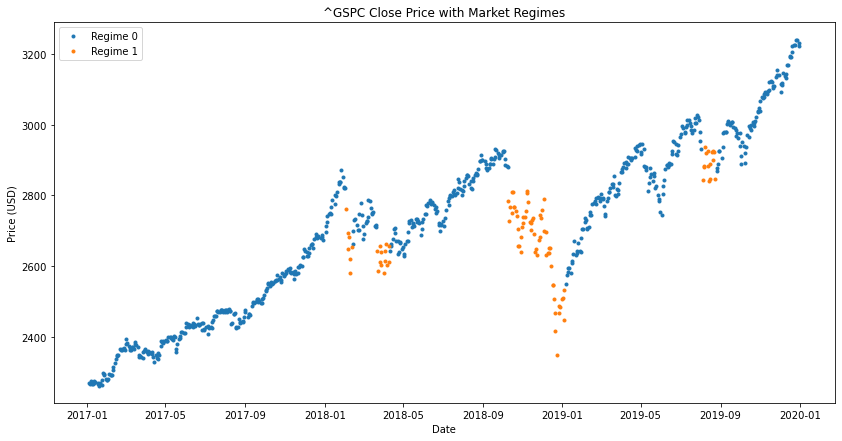

In [9]:
def analyze_asset(ticker, n_components=2):
    hmm_model = MarketRegimeHMM(n_components=n_components)
    hmm_model.fit(data[ticker]['Close'])
    states = hmm_model.predict(data[ticker]['Close'])
    
    plt.figure(figsize=(14, 7))
    for i in range(hmm_model.n_components):
        state = (states == i)
        plt.plot(data[ticker].index[1:][state], data[ticker]['Close'][1:][state], '.', label=f'Regime {i}')
    plt.title(f'{ticker} Close Price with Market Regimes')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    

# Analyze Goldman Sachs Group Inc. (GS)
analyze_asset('^GSPC')

### Market Regime Detection FTSE 100 Jan 2017 to Jan 2020

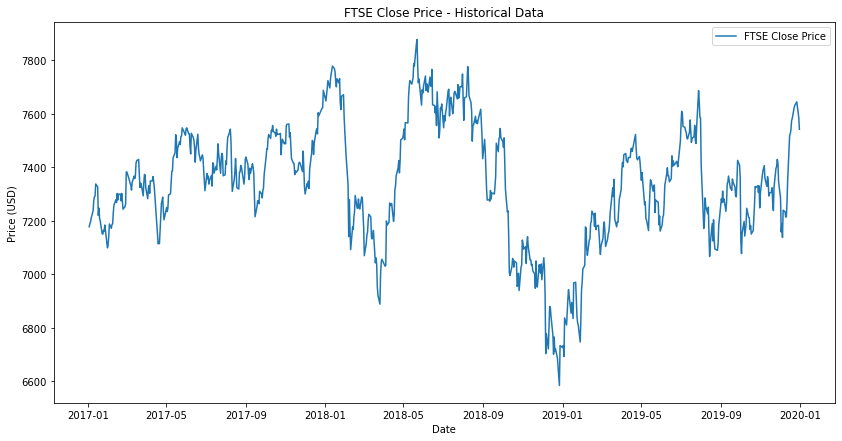

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data['^FTSE']['Close'], label='FTSE Close Price')
plt.title('FTSE Close Price - Historical Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

In [11]:
class MarketRegimeHMM:
    def __init__(self, n_components=2):
        self.model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
        self.n_components = n_components
        
    def fit(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        self.model.fit(returns)
        
    def predict(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        return self.model.predict(returns)

# Instantiate and fit the model to FTSE closing prices
ftse_hmm = MarketRegimeHMM()
ftse_hmm.fit(data['^FTSE']['Close'])

# Predict the hidden states (market regimes)
ftse_states = ftse_hmm.predict(data['^FTSE']['Close'])

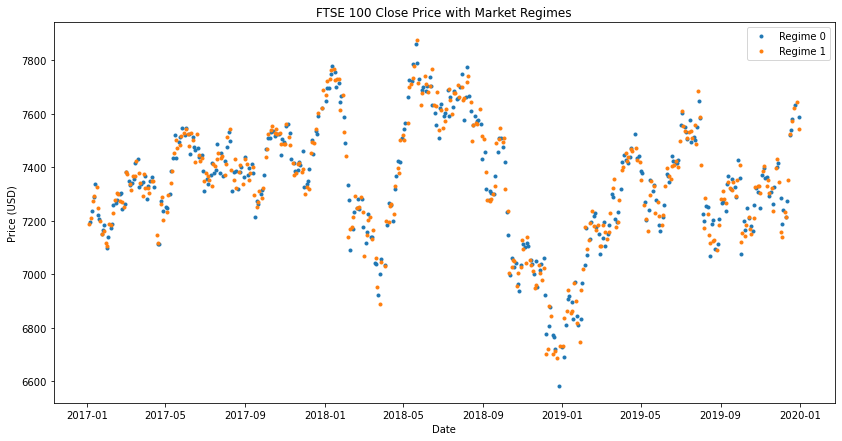

In [12]:
plt.figure(figsize=(14, 7))
for i in range(ftse_hmm.n_components):
    state = (ftse_states == i)
    plt.plot(data['^FTSE'].index[1:][state], data['^FTSE']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('FTSE 100 Close Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

Model is not converging.  Current: 2680.8376267330473 is not greater than 2681.6325483108176. Delta is -0.7949215777703103


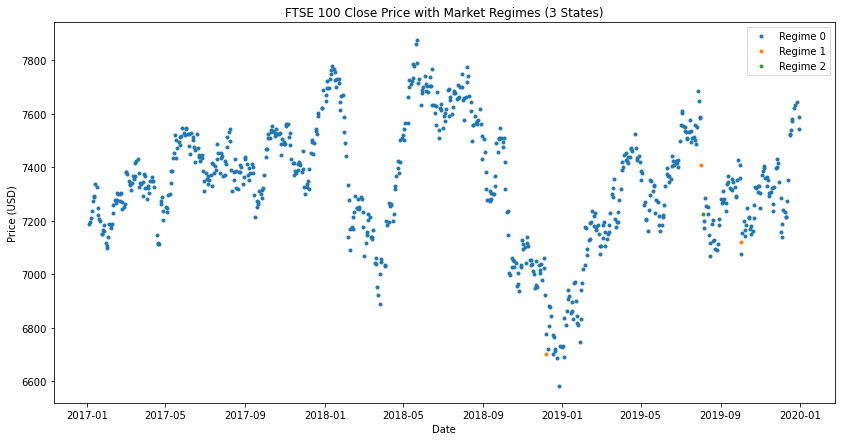

In [14]:
# Try a model with three hidden states
ftse_hmm_3 = MarketRegimeHMM(n_components=3)
ftse_hmm_3.fit(data['^FTSE']['Close'])
ftse_states_3 = ftse_hmm_3.predict(data['^FTSE']['Close'])

# Plot the results
plt.figure(figsize=(14, 7))
for i in range(ftse_hmm_3.n_components):
    state = (ftse_states_3 == i)
    plt.plot(data['^FTSE'].index[1:][state], data['^FTSE']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('FTSE 100 Close Price with Market Regimes (3 States)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


Model is not converging.  Current: 2675.308263992187 is not greater than 2675.450218735808. Delta is -0.1419547436207722


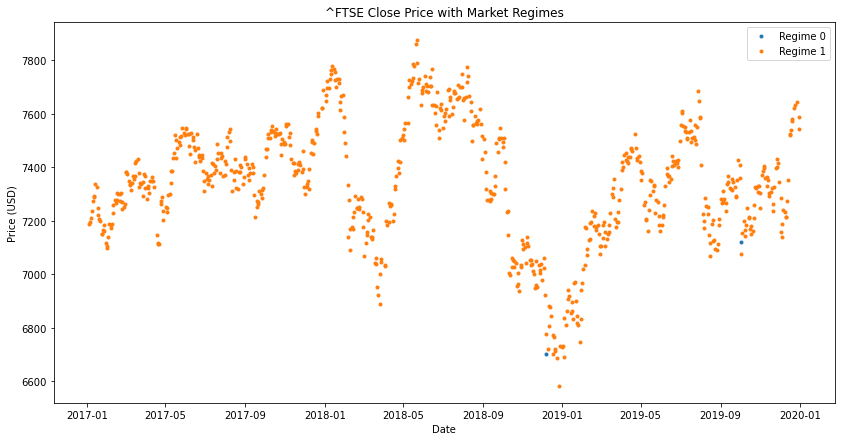

In [15]:
def analyze_asset(ticker, n_components=2):
    hmm_model = MarketRegimeHMM(n_components=n_components)
    hmm_model.fit(data[ticker]['Close'])
    states = hmm_model.predict(data[ticker]['Close'])
    
    plt.figure(figsize=(14, 7))
    for i in range(hmm_model.n_components):
        state = (states == i)
        plt.plot(data[ticker].index[1:][state], data[ticker]['Close'][1:][state], '.', label=f'Regime {i}')
    plt.title(f'{ticker} Close Price with Market Regimes')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    

# Analyze Goldman Sachs Group Inc. (GS)
analyze_asset('^FTSE')

### Market Regime Detection Gold  Jan 2017 to Jan 2020

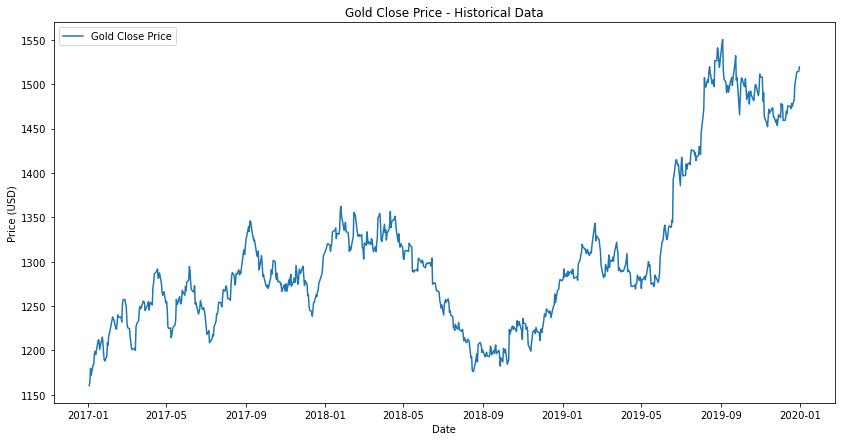

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(data['GC=F']['Close'], label='Gold Close Price')
plt.title('Gold Close Price - Historical Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

In [17]:
class MarketRegimeHMM:
    def __init__(self, n_components=2):
        self.model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
        self.n_components = n_components
        
    def fit(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        self.model.fit(returns)
        
    def predict(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        return self.model.predict(returns)

# Instantiate and fit the model to Gold closing prices
gold_hmm = MarketRegimeHMM()
gold_hmm.fit(data['GC=F']['Close'])

# Predict the hidden states (market regimes)
gold_states = gold_hmm.predict(data['GC=F']['Close'])

Model is not converging.  Current: 2680.023899553964 is not greater than 2680.150826320803. Delta is -0.12692676683900572


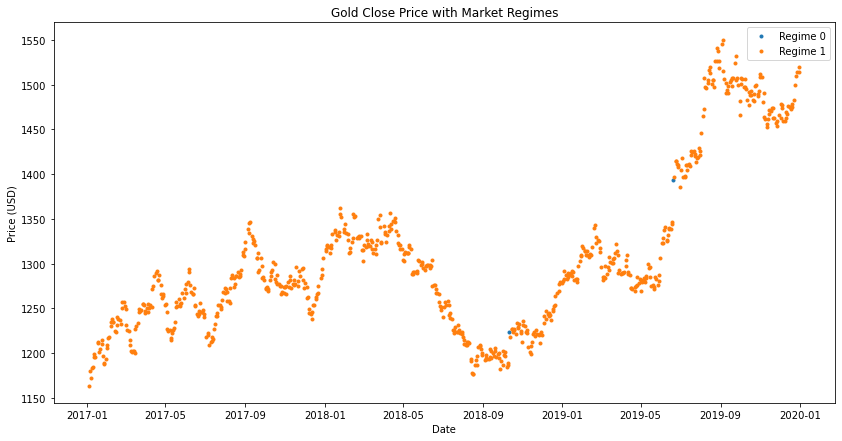

In [18]:
plt.figure(figsize=(14, 7))
for i in range(gold_hmm.n_components):
    state = (gold_states == i)
    plt.plot(data['GC=F'].index[1:][state], data['GC=F']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('Gold Close Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

Model is not converging.  Current: 2652.3637037164144 is not greater than 2652.66891823977. Delta is -0.3052145233555166


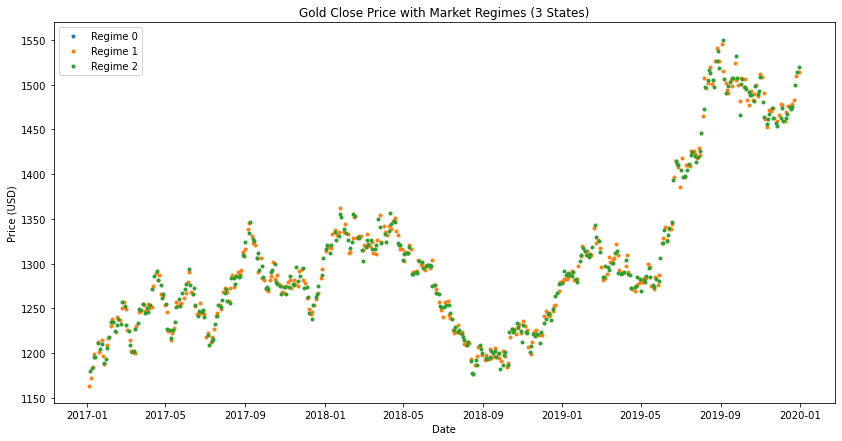

In [22]:
# Try a model with three hidden states
gold_hmm_3 = MarketRegimeHMM(n_components=3)
gold_hmm_3.fit(data['GC=F']['Close'])
gold_states_3 = gold_hmm_3.predict(data['GC=F']['Close'])

# Plot the results
plt.figure(figsize=(14, 7))
for i in range(gold_hmm_3.n_components):
    state = (gold_states_3 == i)
    plt.plot(data['GC=F'].index[1:][state], data['GC=F']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('Gold Close Price with Market Regimes (3 States)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

In [23]:
def analyze_asset(ticker, n_components=2):
    hmm_model = MarketRegimeHMM(n_components=n_components)
    hmm_model.fit(data[ticker]['Close'])
    states = hmm_model.predict(data[ticker]['Close'])
    
    plt.figure(figsize=(14, 7))
    for i in range(hmm_model.n_components):
        state = (states == i)
        plt.plot(data[ticker].index[1:][state], data[ticker]['Close'][1:][state], '.', label=f'Regime {i}')
    plt.title(f'{ticker} Close Price with Market Regimes')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    

Model is not converging.  Current: 2680.0312653861547 is not greater than 2680.139485466804. Delta is -0.1082200806495166


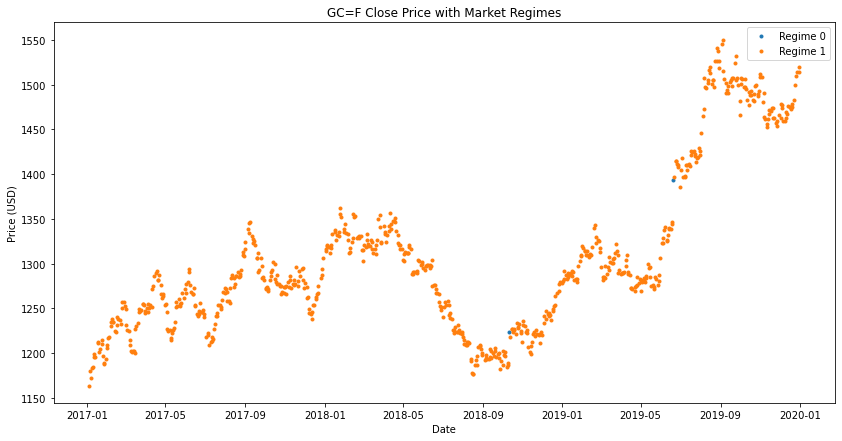

In [24]:
analyze_asset('GC=F')

### Market Regime Detection Crude Oil  Jan 2017 to Jan 2020

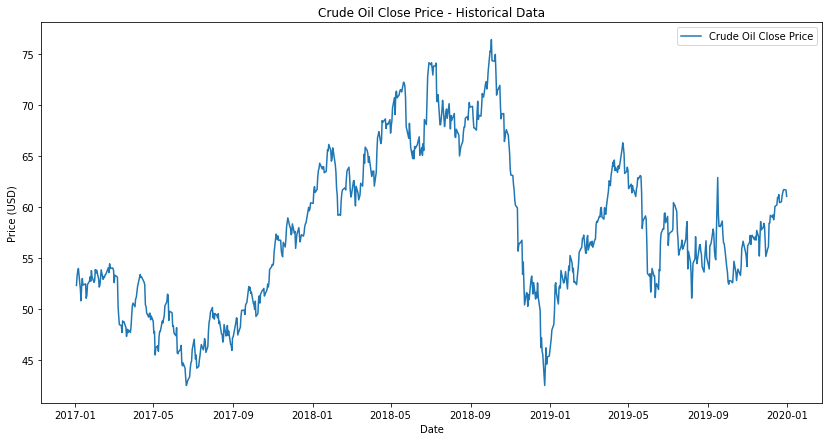

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(data['CL=F']['Close'], label='Crude Oil Close Price')
plt.title('Crude Oil Close Price - Historical Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


In [26]:
class MarketRegimeHMM:
    def __init__(self, n_components=2):
        self.model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
        self.n_components = n_components
        
    def fit(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        self.model.fit(returns)
        
    def predict(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        return self.model.predict(returns)


In [30]:
# Instantiate and fit the model to FTSE closing prices
oil_hmm = MarketRegimeHMM()
oil_hmm.fit(data['CL=F']['Close'])

# Predict the hidden states (market regimes)
oil_states = oil_hmm.predict(data['CL=F']['Close'])



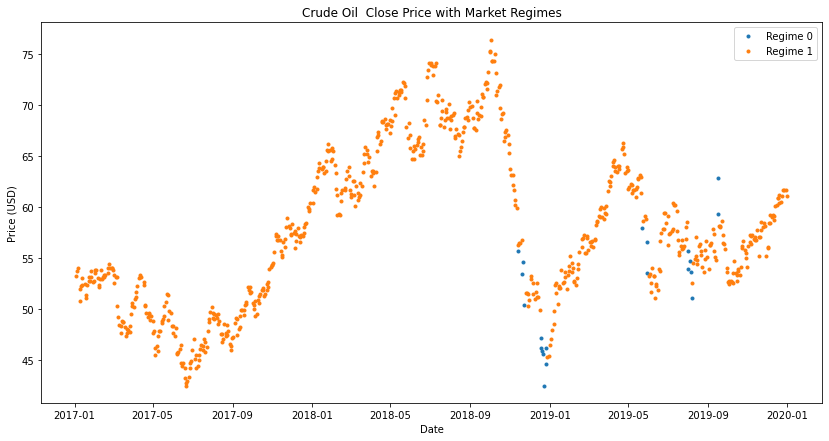

In [31]:
plt.figure(figsize=(14, 7))
for i in range(oil_hmm.n_components):
    state = (oil_states == i)
    plt.plot(data['CL=F'].index[1:][state], data['CL=F']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('Crude Oil  Close Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


In [33]:
# Try a model with three hidden states
oil_hmm_3 = MarketRegimeHMM(n_components=3)
oil_hmm_3.fit(data['CL=F']['Close'])
oil_states_3 = oil_hmm_3.predict(data['CL=F']['Close'])

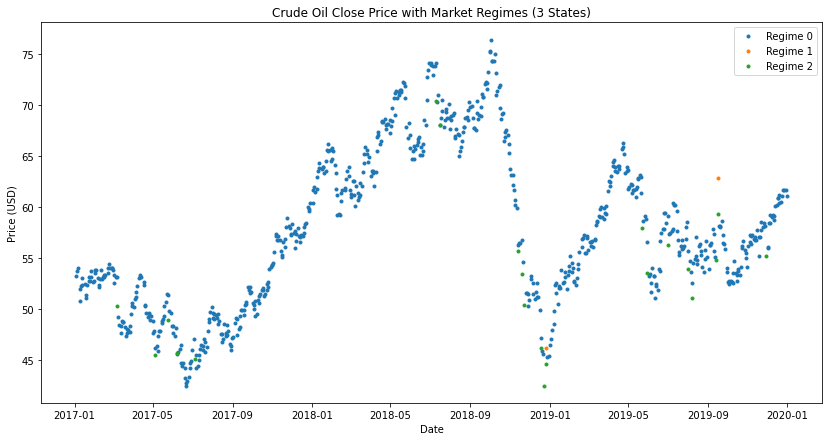

In [34]:
# Plot the results
plt.figure(figsize=(14, 7))
for i in range(oil_hmm_3.n_components):
    state = (oil_states_3 == i)
    plt.plot(data['CL=F'].index[1:][state], data['CL=F']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('Crude Oil Close Price with Market Regimes (3 States)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

In [41]:
def analyze_asset(ticker, n_components=2):
    hmm_model = MarketRegimeHMM(n_components=n_components)
    hmm_model.fit(data[ticker]['Close'])
    states = hmm_model.predict(data[ticker]['Close'])

In [43]:
def analyze_asset(ticker, n_components=2):
    hmm_model = MarketRegimeHMM(n_components=n_components)
    hmm_model.fit(data[ticker]['Close'])
    states = hmm_model.predict(data[ticker]['Close'])
    
    plt.figure(figsize=(14, 7))
    for i in range(hmm_model.n_components):
        state = (states == i)
        plt.plot(data[ticker].index[1:][state], data[ticker]['Close'][1:][state], '.', label=f'Regime {i}')
    plt.title(f'{ticker} Close Price with Market Regimes')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

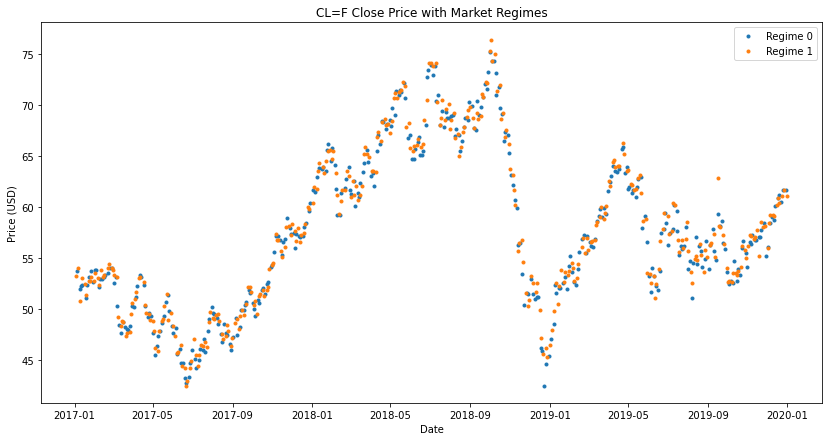

In [44]:
analyze_asset('CL=F')

### Market Regime Detection BTC-USD  Jan 2017 to Jan 2020

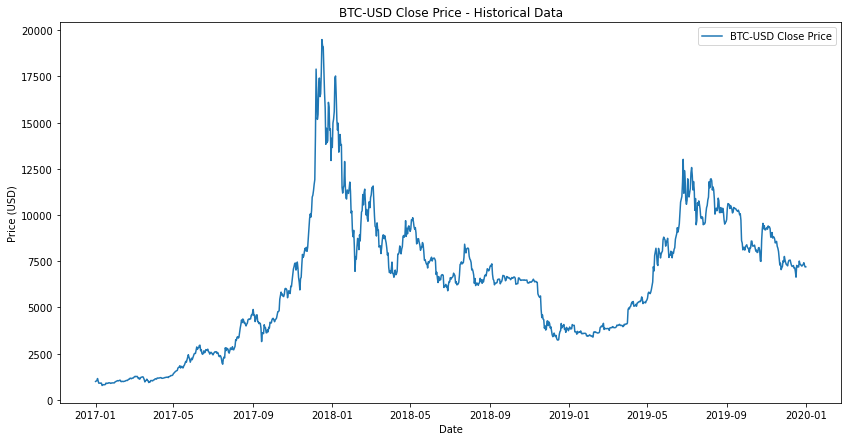

In [45]:
plt.figure(figsize=(14, 7))
plt.plot(data['BTC-USD']['Close'], label='BTC-USD Close Price')
plt.title('BTC-USD Close Price - Historical Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


In [46]:
class MarketRegimeHMM:
    def __init__(self, n_components=2):
        self.model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
        self.n_components = n_components
        
    def fit(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        self.model.fit(returns)
        
    def predict(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        return self.model.predict(returns)


In [47]:
# Instantiate and fit the model to FTSE closing prices
btc_hmm = MarketRegimeHMM()
btc_hmm.fit(data['BTC-USD']['Close'])

# Predict the hidden states (market regimes)
btc_states = btc_hmm.predict(data['BTC-USD']['Close'])


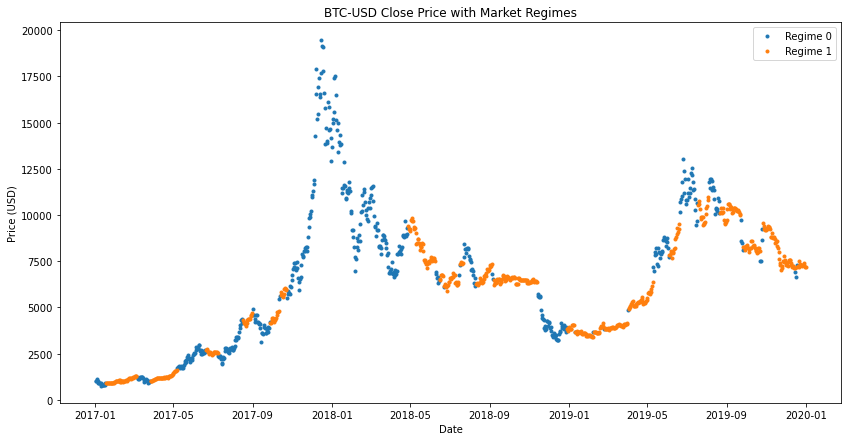

In [49]:
plt.figure(figsize=(14, 7))
for i in range(btc_hmm.n_components):
    state = (btc_states == i)
    plt.plot(data['BTC-USD'].index[1:][state], data['BTC-USD']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('BTC-USD Close Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


In [50]:
# Try a model with three hidden states
btc_hmm_3 = MarketRegimeHMM(n_components=3)
btc_hmm_3.fit(data['BTC-USD']['Close'])
btc_states_3 = btc_hmm_3.predict(data['BTC-USD']['Close'])

Model is not converging.  Current: 2073.2712122403186 is not greater than 2073.280602931521. Delta is -0.009390691202497692


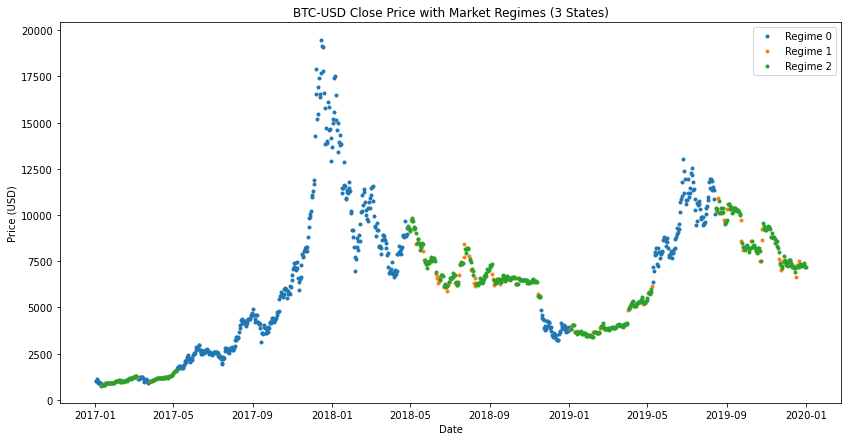

In [51]:
# Plot the results
plt.figure(figsize=(14, 7))
for i in range(btc_hmm_3.n_components):
    state = (btc_states_3 == i)
    plt.plot(data['BTC-USD'].index[1:][state], data['BTC-USD']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('BTC-USD Close Price with Market Regimes (3 States)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


In [54]:
def analyze_asset(ticker, n_components=2):
    hmm_model = MarketRegimeHMM(n_components=n_components)
    hmm_model.fit(data[ticker]['Close'])
    states = hmm_model.predict(data[ticker]['Close'])
    
    plt.figure(figsize=(14, 7))
    for i in range(hmm_model.n_components):
        state = (states == i)
        plt.plot(data[ticker].index[1:][state], data[ticker]['Close'][1:][state], '.', label=f'Regime {i}')
    plt.title(f'{ticker} Close Price with Market Regimes')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    

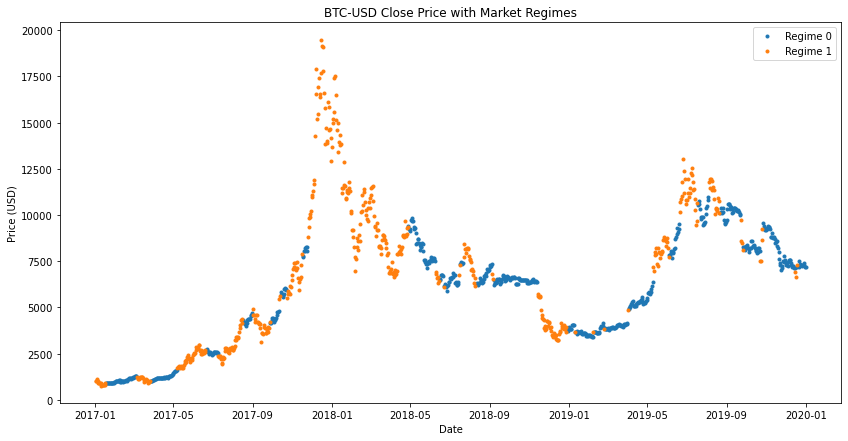

In [55]:
analyze_asset('BTC-USD')

### Market Regime Detection TLT  Jan 2017 to Jan 2020

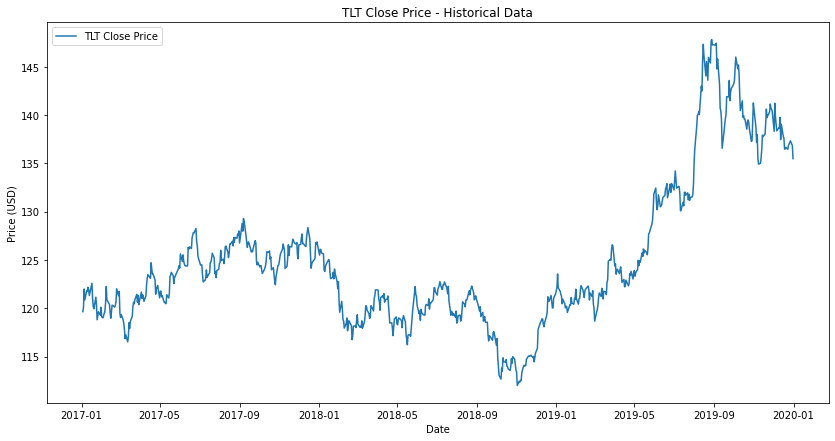

In [56]:
plt.figure(figsize=(14, 7))
plt.plot(data['TLT']['Close'], label='TLT Close Price')
plt.title('TLT Close Price - Historical Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


In [57]:
class MarketRegimeHMM:
    def __init__(self, n_components=2):
        self.model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
        self.n_components = n_components
        
    def fit(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        self.model.fit(returns)
        
    def predict(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        return self.model.predict(returns)

In [58]:
# Instantiate and fit the model to FTSE closing prices
tlt_hmm = MarketRegimeHMM()
tlt_hmm.fit(data['TLT']['Close'])

# Predict the hidden states (market regimes)
tlt_states = tlt_hmm.predict(data['TLT']['Close'])



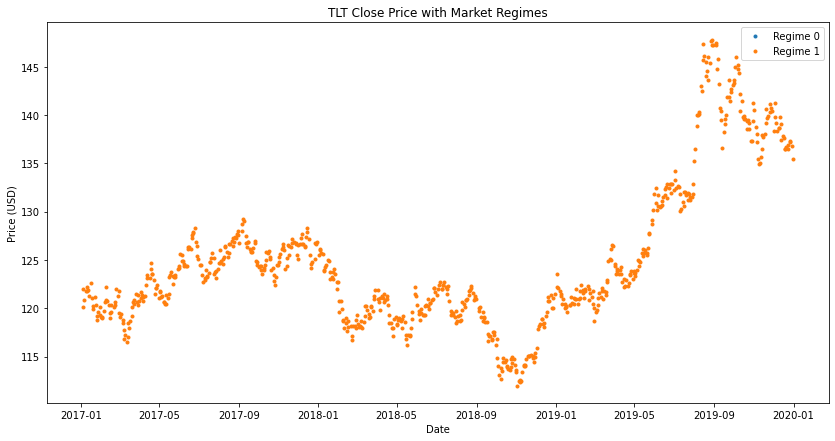

In [59]:
plt.figure(figsize=(14, 7))
for i in range(tlt_hmm.n_components):
    state = (tlt_states == i)
    plt.plot(data['TLT'].index[1:][state], data['TLT']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('TLT Close Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


In [60]:
# Try a model with three hidden states
tlt_hmm_3 = MarketRegimeHMM(n_components=3)
tlt_hmm_3.fit(data['TLT']['Close'])
tlt_states_3 = tlt_hmm_3.predict(data['TLT']['Close'])

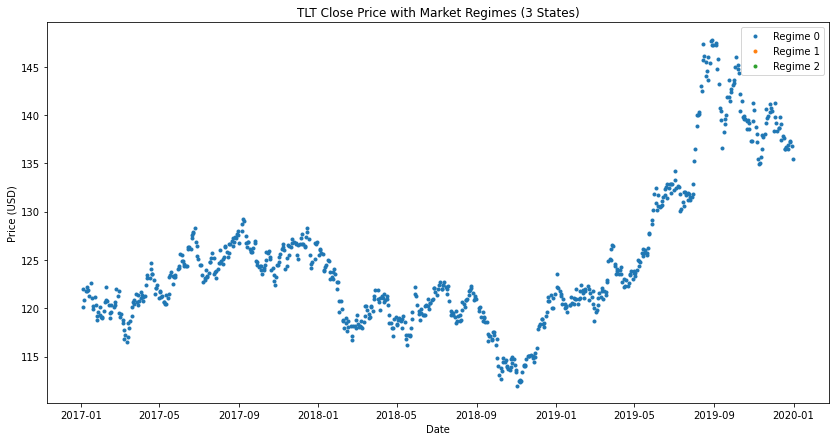

In [61]:
# Plot the results
plt.figure(figsize=(14, 7))
for i in range(tlt_hmm_3.n_components):
    state = (tlt_states_3 == i)
    plt.plot(data['TLT'].index[1:][state], data['TLT']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('TLT Close Price with Market Regimes (3 States)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

In [62]:
def analyze_asset(ticker, n_components=2):
    hmm_model = MarketRegimeHMM(n_components=n_components)
    hmm_model.fit(data[ticker]['Close'])
    states = hmm_model.predict(data[ticker]['Close'])
    
    plt.figure(figsize=(14, 7))
    for i in range(hmm_model.n_components):
        state = (states == i)
        plt.plot(data[ticker].index[1:][state], data[ticker]['Close'][1:][state], '.', label=f'Regime {i}')
    plt.title(f'{ticker} Close Price with Market Regimes')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()


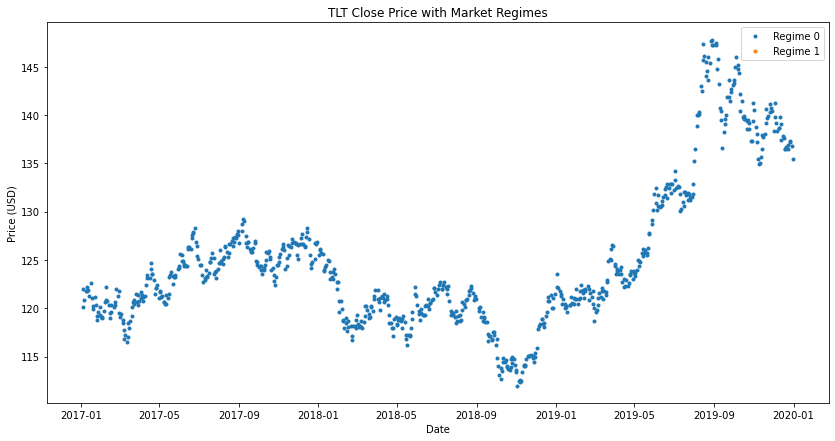

In [63]:
analyze_asset('TLT')